# Question 3c, idk

# Question 2

In [4]:
import pandas as pd
import numpy as np
# from apyori import 

### Loading in the data

In [5]:
# load the bank transaction dataset
df = pd.read_csv('retail_row.csv')

# info and the first 10 transactions
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459223 entries, 0 to 459222
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   LOC         459223 non-null  int64 
 1   TRANS_ID    459223 non-null  int64 
 2   TRANS_DATE  459223 non-null  object
 3   PRODUCT     459223 non-null  object
 4   QUANTITY    459223 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 17.5+ MB
None
   LOC  TRANS_ID  TRANS_DATE PRODUCT  QUANTITY
0    6     12572  12/23/2018     Tea         1
1    6     12572  12/23/2018     Tea         1
2    6     12572  12/23/2018     Tea         1
3    4     12575  12/23/2018     Tea         1
4   10     12578  12/23/2018     Egg         1
5    3     12587  12/23/2018     Tea         1
6    3     12587  12/23/2018     Tea         1
7    3     12620  12/23/2018  Cereal         1
8    3     12620  12/23/2018   Bread         1
9    3     12620  12/23/2018   Bread         1


### Combining the transactions into a list for association mining

In [6]:
# group by transaction ID then list all the products. Note that the set function was used instead of list to remove duplicates.
transactions = df.groupby(['TRANS_ID'])['PRODUCT'].apply(set)#.apply(list)

print(transactions.head(5))

TRANS_ID
12572              {Tea}
12575              {Tea}
12578              {Egg}
12587              {Tea}
12620    {Cereal, Bread}
Name: PRODUCT, dtype: object


### Running the rule finding

In [7]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.005))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'Bread'}), support=0.05464464479480756, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Bread'}), confidence=0.05464464479480756, lift=1.0)]), RelationRecord(items=frozenset({'Butter'}), support=0.06735572523664511, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Butter'}), confidence=0.06735572523664511, lift=1.0)]), RelationRecord(items=frozenset({'Cereal'}), support=0.05847997079751779, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cereal'}), confidence=0.05847997079751779, lift=1.0)]), RelationRecord(items=frozenset({'Cheese'}), support=0.014506233029807533, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Cheese'}), confidence=0.014506233029807533, lift=1.0)]), RelationRecord(items=frozenset({'Coffee'}), support=0.04302865743588205, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozens

In [8]:
# Total number of transactions
len(transactions)

199983

In [9]:
# If we choose a minimum support of 0.005, this is how many transactions the rule would need to be present in.
len(transactions) * 0.005

999.9150000000001

In [10]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

In [11]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(10))

           Left_side       Right_side   Support  Confidence      Lift
52             Sugar           Cheese  0.006076    0.119141  8.213091
51            Cheese            Sugar  0.006076    0.418821  8.213091
131  Conditioner,Tea           Butter  0.006491    0.377545  5.605241
126           Butter  Conditioner,Tea  0.006491    0.096362  5.605241
127      Conditioner       Butter,Tea  0.006491    0.072143  5.475297
130       Butter,Tea      Conditioner  0.006491    0.492600  5.475297
214      Egg,Shampoo      Yoghurt,Tea  0.005820    0.181421  4.476398
219      Yoghurt,Tea      Egg,Shampoo  0.005820    0.143615  4.476398
217      Shampoo,Tea      Egg,Yoghurt  0.005820    0.183799  4.209908
216      Egg,Yoghurt      Shampoo,Tea  0.005820    0.133318  4.209908


# Assignment questions

### Question 1. Can you identify data quality issues in this dataset for performing association analysis?
The quantity variable is all equal to 1. Instead of having the quantity increase for multiple purchases of an item, they just add the same item as a transaction with the quantity of 1. 

In [12]:
df.describe()

,LOC,TRANS_ID,QUANTITY
count,459223.000000,4.592230e+05,459223.0
mean,5.490999,6.180346e+05,1.0
std,2.867294,3.511314e+05,0.0
min,1.000000,1.257200e+04,1.0
25%,3.000000,3.125300e+05,1.0
50%,5.000000,6.168770e+05,1.0
75%,8.000000,9.254480e+05,1.0
max,10.000000,1.221866e+06,1.0


### Question 2. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
The variables used were trans ID and product. The products were grouped together by their transaction ID to create the "transactions". Then each transaction (the list of all of the products in each transaction) was converted into a set to remove duplicate values. As we understand association mining, we mainly care about if someone buys at least 1 of x, then what is the probability of them buying at least 1 of y. Adding in each transaction where people are buying multiple of products could lead to many more associations with very few occurences because of the rarity. As a result, converting the lists to a set was chosen.

### Question 3. Conduct association mining and answer the following:
#### a) What is the highest lift value for the resulting rules? Which rule has this value?

People that buy sugar also buy cheese. This has a lift of 8.213091

In [13]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(10))

           Left_side       Right_side   Support  Confidence      Lift
52             Sugar           Cheese  0.006076    0.119141  8.213091
51            Cheese            Sugar  0.006076    0.418821  8.213091
131  Conditioner,Tea           Butter  0.006491    0.377545  5.605241
126           Butter  Conditioner,Tea  0.006491    0.096362  5.605241
127      Conditioner       Butter,Tea  0.006491    0.072143  5.475297
130       Butter,Tea      Conditioner  0.006491    0.492600  5.475297
214      Egg,Shampoo      Yoghurt,Tea  0.005820    0.181421  4.476398
219      Yoghurt,Tea      Egg,Shampoo  0.005820    0.143615  4.476398
216      Egg,Yoghurt      Shampoo,Tea  0.005820    0.133318  4.209908
217      Shampoo,Tea      Egg,Yoghurt  0.005820    0.183799  4.209908


#### b) What is the highest confidence value for the resulting rules? Which rule has this value?
People that buy butter and tea, also buy conditioner. This has a confidence of 0.4296

In [14]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Confidence', ascending=False)
print(result_df.head(10))

                 Left_side   Right_side   Support  Confidence      Lift
130             Butter,Tea  Conditioner  0.006491    0.492600  5.475297
220        Egg,Shampoo,Tea      Yoghurt  0.005820    0.487233  2.849408
164        Cordial,Shampoo      Yoghurt  0.011391    0.463762  2.712146
192                Egg,Tea      Yoghurt  0.016661    0.458574  2.681806
221    Egg,Yoghurt,Shampoo          Tea  0.005820    0.441746  1.830611
206            Shampoo,Tea      Yoghurt  0.013721    0.433286  2.533917
223    Yoghurt,Shampoo,Tea          Egg  0.005820    0.424198  2.887913
51                  Cheese        Sugar  0.006076    0.418821  8.213091
200  Peanut butter,Yoghurt          Tea  0.005110    0.416633  1.726542
194            Yoghurt,Tea          Egg  0.016661    0.411104  2.798770


#### c) Plot the confidence, lift, and support of the resulting rules. Interpret them to discuss the rule-set obtained.

<AxesSubplot:xlabel='Support', ylabel='Lift'>

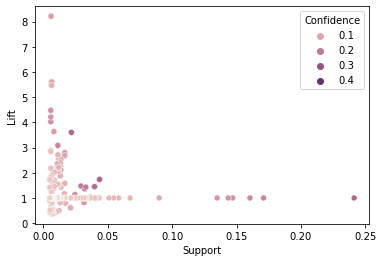

In [27]:
import matplotlib.pylab as plt
import seaborn as sns
# plt.scatter(result_df.Support, result_df.Confidence, c=result_df.Lift)
sns.scatterplot(x="Support", y="Lift", data=result_df, hue="Confidence", palette="YlOrBr")

### 4. The store is particularly interested in products that individuals purchase when they buy “Yoghurt”.
#### a) How many rules are in the subset? 
There are 15 rules in this subset

In [16]:
# Rules in the dataset
yog_df = result_df.loc[result_df['Left_side'] == 'Yoghurt'].sort_values(by='Lift', ascending=False)
yog_df.shape[0]

15

#### b) Based on the rules, what are the other products these individuals are most likely to purchase?
Egg, tea, shampoo and cordial.

In [17]:
yog_df.sort_values(by='Lift', ascending=False)

,Left_side,Right_side,Support,Confidence,Lift
213,Yoghurt,"Egg,Shampoo,Tea",0.005820,0.034039,2.849408
163,Yoghurt,"Cordial,Shampoo",0.011391,0.066616,2.712146
191,Yoghurt,"Egg,Tea",0.016661,0.097438,2.681806
205,Yoghurt,"Shampoo,Tea",0.013721,0.080243,2.533917
184,Yoghurt,"Egg,Shampoo",0.013176,0.077056,2.401784
170,Yoghurt,"Cordial,Tea",0.012001,0.070184,2.219057
97,Yoghurt,Egg,0.043659,0.255322,1.738217
149,Yoghurt,"Egg,Cordial",0.008096,0.047345,1.619039
118,Yoghurt,Shampoo,0.039783,0.232659,1.450232
85,Yoghurt,Cordial,0.033013,0.193064,1.430826


### 5. How the outcome of this study can be used by decision makers?
1. Put them closer together in the store.
2. Package the items together.
3. Package the items together with another poorly selling item.
4. Raising the price on one then lower the price on another.
5. Don't advertise these items together.